In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../datasets/placement_marks.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<AxesSubplot: xlabel='placement_exam_marks', ylabel='Count'>

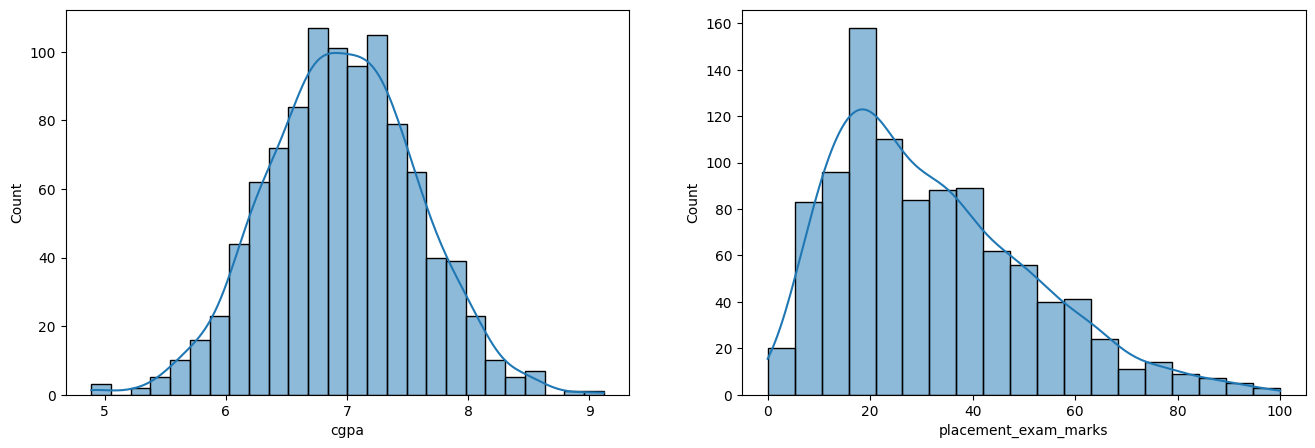

In [3]:
fig ,(ax1,ax2) = plt.subplots(1,2,figsize=(16,5))

sns.histplot(df['cgpa'],ax=ax1,kde=True)
sns.histplot(df['placement_exam_marks'],ax=ax2,kde=True)

### lets test out the IQR method for the skewed data i.e p;lacement_exam_marks

In [4]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [5]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<AxesSubplot: >

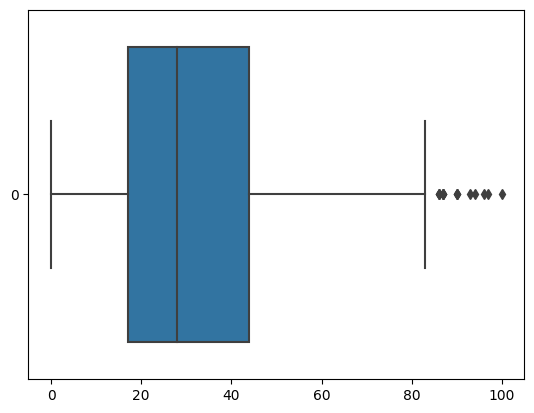

In [6]:
sns.boxplot(df['placement_exam_marks'],orient='horizontal')

### Its simple, we can see there are outliers , now we just need to remove them , Either Trimming or Capping

In [7]:
# Finding IQR
percentile_25th = df['placement_exam_marks'].quantile(0.25)
percentile_75th = df['placement_exam_marks'].quantile(0.75)

percentile_25th,percentile_75th

(17.0, 44.0)

In [8]:
iqr = percentile_75th - percentile_25th
iqr

27.0

In [9]:
# calculate the upper limit and lower limit using iqr

upper_lim = percentile_75th + 1.5 * iqr
lower_lim = percentile_25th - 1.5 * iqr

upper_lim,lower_lim

(84.5, -23.5)

In [10]:
# finding outliers
outliers = df[df['placement_exam_marks'] > upper_lim]
outliers

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


### Trimming

In [12]:
new_df = df[df['placement_exam_marks'] < upper_lim]

In [13]:
new_df.shape

(985, 3)

### lets compare the previous and trimmed data

<AxesSubplot: >

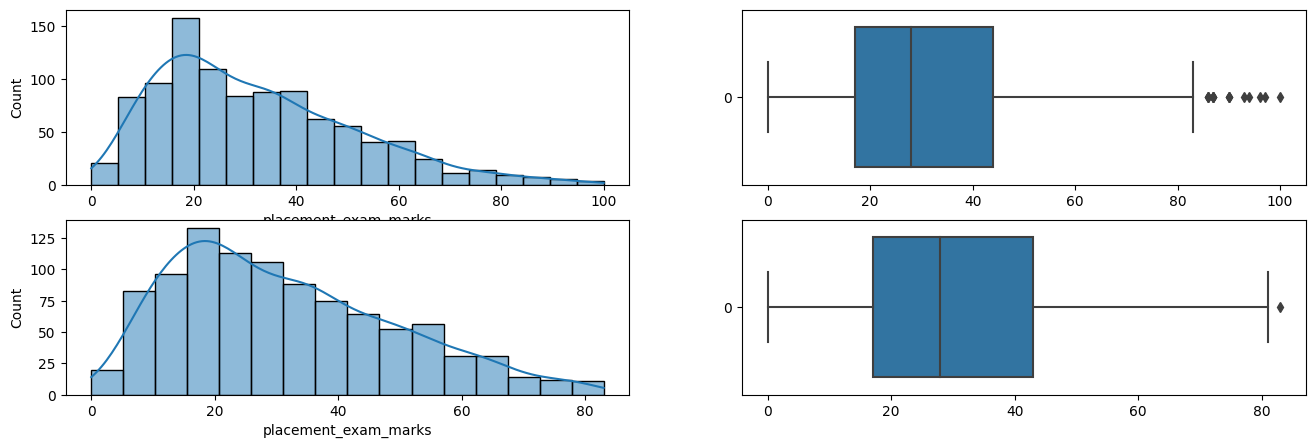

In [21]:
fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(16, 5))

sns.histplot(df['placement_exam_marks'],ax=ax1,kde=True)
sns.boxplot(df['placement_exam_marks'],ax=ax2,orient='horizontal')

sns.histplot(new_df['placement_exam_marks'],ax=ax3,kde=True)
sns.boxplot(new_df['placement_exam_marks'],ax=ax4,orient='horizontal')

### Not much change on the distrubution but as u can see on the boxplot, most of the outliers are removed